In [3]:
!pip install NLP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.1 MB/s eta 0:00:00


In [4]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e57da49ac304cc63c1518412d1652c46028947b4c1cf37d79e573c13adc1c909
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm
from nltk import sent_tokenize
#nltk.download('punkt')

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

import keras
from keras.layers import Input, LSTM, Dense, Embedding, Dropout
from keras.models import Model

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [8]:
df1=pd.read_csv('/content/drive/MyDrive/Patient_Dataset/patient_notes.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Patient_Dataset/features.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Patient_Dataset/patient_train.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Patient_Dataset/patient_test.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Patient_Dataset/patient_sample_submission.csv')

In [9]:
df1.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [10]:
df1.tail()

,pn_num,case_num,pn_history
42141,95330,9,Ms. Madden is a 20 yo female presenting w/ the...
42142,95331,9,A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143,95332,9,Ms. Madden is a 20yo female who presents with ...
42144,95333,9,Stephanie madden is a 20 year old woman compla...
42145,95334,9,patient is a 20 yo F who presents with a heada...


In [11]:
df1.shape

(42146, 3)

In [15]:
df1.columns

Index(['pn_num', 'case_num', 'pn_history'], dtype='object')

In [16]:
df1.duplicated().sum()

0

In [14]:
df1.isnull().sum()

pn_num        0
case_num      0
pn_history    0
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42146 entries, 0 to 42145
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pn_num      42146 non-null  int64 
 1   case_num    42146 non-null  int64 
 2   pn_history  42146 non-null  object
dtypes: int64(2), object(1)
memory usage: 987.9+ KB


In [18]:
df1.describe()

,pn_num,case_num
count,42146.000000,42146.000000
mean,52440.256347,4.943862
std,25165.865233,2.529762
min,0.000000,0.000000
25%,35618.250000,3.000000
50%,50911.500000,5.000000
75%,73037.750000,7.000000
max,95334.000000,9.000000


In [19]:
df1.nunique()

pn_num        42146
case_num         10
pn_history    42146
dtype: int64

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df1['case_num'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
df1['case_num'].value_counts()

3    9753
5    6909
4    5405
9    5151
8    4196
7    4101
0    2268
2    1958
6    1597
1     808
Name: case_num, dtype: int64

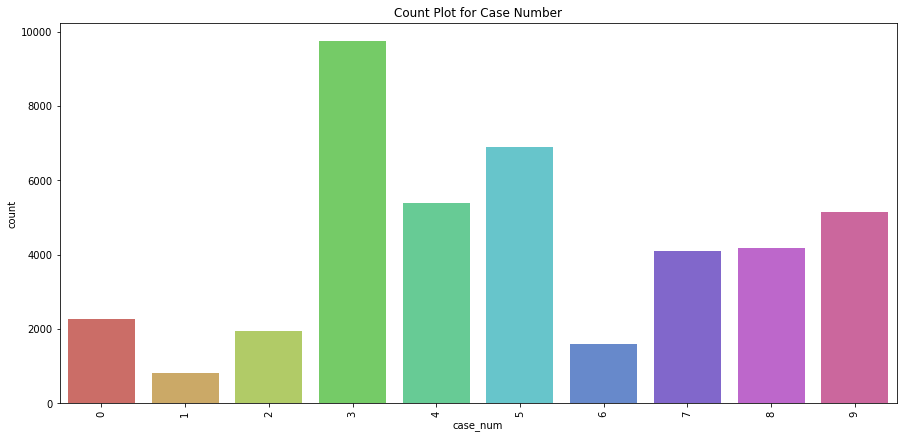

In [23]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Case Number')
sns.countplot(x = 'case_num', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

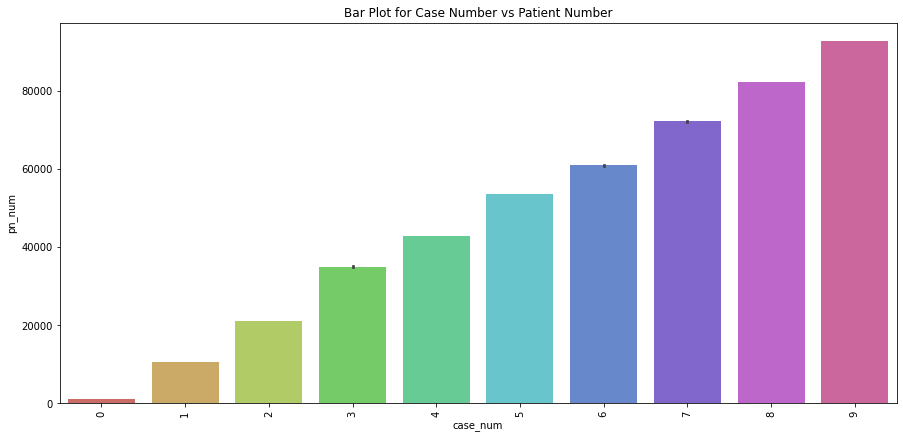

In [24]:
plt.figure(figsize=[15,7],)
plt.title('Bar Plot for Case Number vs Patient Number')
sns.barplot(x = 'case_num', y = 'pn_num', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [25]:
import plotly.express as px

In [26]:
fig = px.box(df1, x = 'case_num', y = 'pn_num')
fig.show()

In [27]:
df2.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [28]:
df2.tail()

,feature_num,case_num,feature_text
138,912,9,Family-history-of-migraines
139,913,9,Female
140,914,9,Photophobia
141,915,9,No-known-illness-contacts
142,916,9,Subjective-fever


In [29]:
df2.shape

(143, 3)

In [30]:
df2.duplicated().sum()

0

In [31]:
df2.isnull().sum()

feature_num     0
case_num        0
feature_text    0
dtype: int64

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   feature_num   143 non-null    int64 
 1   case_num      143 non-null    int64 
 2   feature_text  143 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [33]:
df2.describe()

,feature_num,case_num
count,143.000000,143.000000
mean,466.440559,4.594406
std,293.332543,2.929303
min,0.000000,0.000000
25%,209.500000,2.000000
50%,502.000000,5.000000
75%,707.500000,7.000000
max,916.000000,9.000000


In [34]:
df2.nunique()

feature_num     143
case_num         10
feature_text    131
dtype: int64

In [35]:
df3.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [36]:
df3.tail()

,id,case_num,pn_num,feature_num,annotation,location
14295,95333_912,9,95333,912,[],[]
14296,95333_913,9,95333,913,[],[]
14297,95333_914,9,95333,914,['photobia'],['274 282']
14298,95333_915,9,95333,915,['no sick contacts'],['421 437']
14299,95333_916,9,95333,916,['Subjective fever'],['314 330']


In [37]:
df3.shape

(14300, 6)

In [38]:
df3.columns

Index(['id', 'case_num', 'pn_num', 'feature_num', 'annotation', 'location'], dtype='object')

In [39]:
df3.duplicated().sum()

0

In [40]:
df3.isnull().sum()

id             0
case_num       0
pn_num         0
feature_num    0
annotation     0
location       0
dtype: int64

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14300 non-null  object
 1   case_num     14300 non-null  int64 
 2   pn_num       14300 non-null  int64 
 3   feature_num  14300 non-null  int64 
 4   annotation   14300 non-null  object
 5   location     14300 non-null  object
dtypes: int64(3), object(3)
memory usage: 670.4+ KB


In [42]:
df3.describe()

,case_num,pn_num,feature_num
count,14300.000000,14300.000000,14300.000000
mean,4.594406,48223.952448,466.440559
std,2.919144,29608.965339,292.315326
min,0.000000,16.000000,0.000000
25%,2.000000,21317.000000,209.000000
50%,5.000000,51040.000000,502.000000
75%,7.000000,73834.000000,708.000000
max,9.000000,95333.000000,916.000000


In [43]:
df3.nunique()

id             14300
case_num          10
pn_num          1000
feature_num      143
annotation      5201
location        7534
dtype: int64

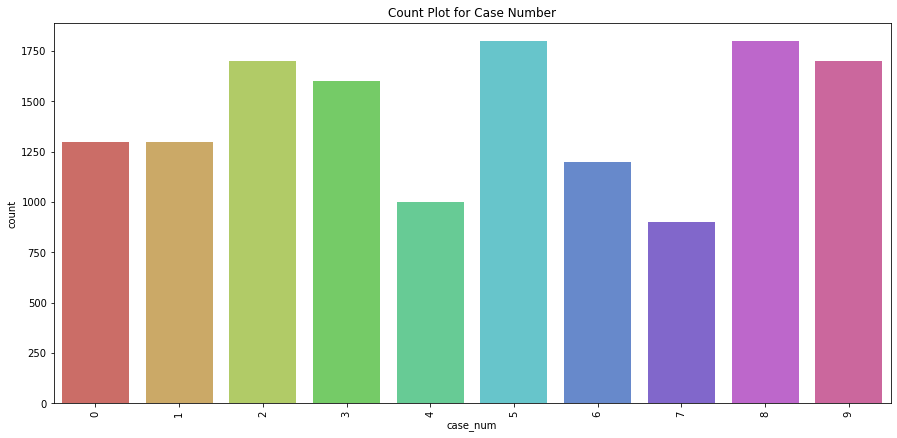

In [44]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Case Number')
sns.countplot(x = 'case_num', data = df3, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

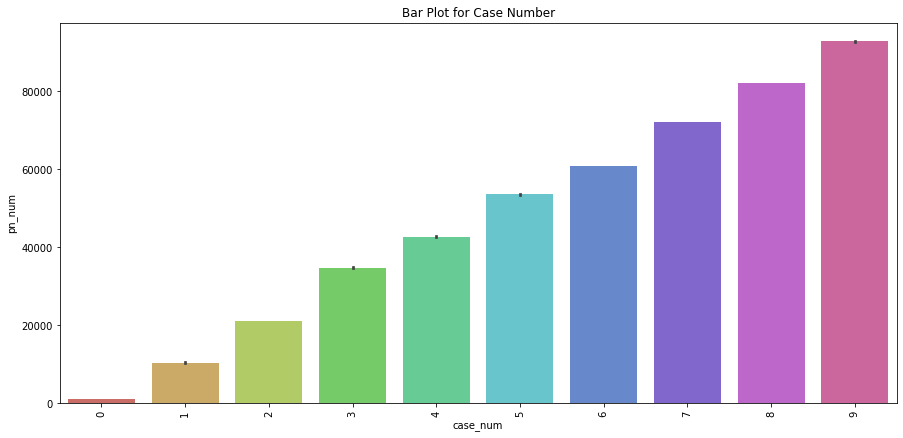

In [45]:
plt.figure(figsize=[15,7],)
plt.title('Bar Plot for Case Number')
sns.barplot(x = 'case_num', y = 'pn_num', data = df3, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

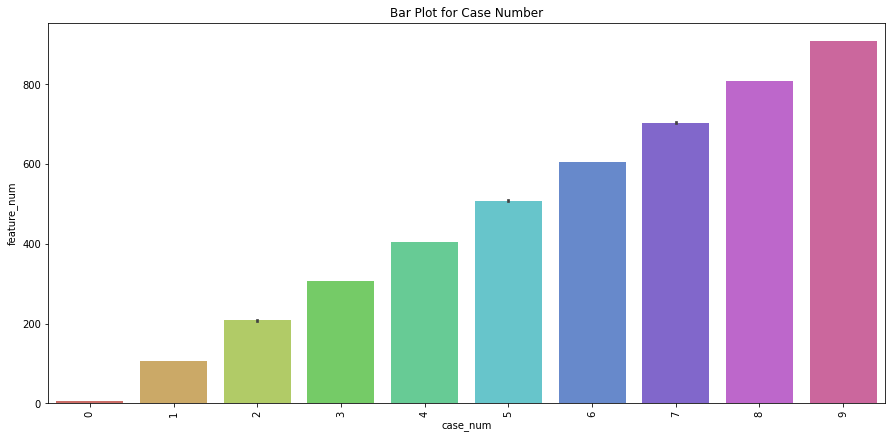

In [46]:
plt.figure(figsize=[15,7],)
plt.title('Bar Plot for Case Number')
sns.barplot(x = 'case_num', y = 'feature_num', data = df3, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [47]:
df4.head()

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


In [48]:
df4.tail()

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


In [49]:
df4.shape

(5, 4)

In [50]:
df4.columns

Index(['id', 'case_num', 'pn_num', 'feature_num'], dtype='object')

In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5 non-null      object
 1   case_num     5 non-null      int64 
 2   pn_num       5 non-null      int64 
 3   feature_num  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [52]:
df4.describe()

,case_num,pn_num,feature_num
count,5.0,5.0,5.000000
mean,0.0,16.0,2.000000
std,0.0,0.0,1.581139
min,0.0,16.0,0.000000
25%,0.0,16.0,1.000000
50%,0.0,16.0,2.000000
75%,0.0,16.0,3.000000
max,0.0,16.0,4.000000


In [53]:
df4.nunique()

id             5
case_num       1
pn_num         1
feature_num    5
dtype: int64

In [54]:
df5.head()

,id,location
0,00016_000,0 100
1,00016_001,NaN
2,00016_002,200 250;300 400
3,00016_003,NaN
4,00016_004,75 110


In [55]:
df5.tail()

,id,location
0,00016_000,0 100
1,00016_001,NaN
2,00016_002,200 250;300 400
3,00016_003,NaN
4,00016_004,75 110


In [56]:
df5.shape

(5, 2)

In [57]:
df5.columns

Index(['id', 'location'], dtype='object')

In [58]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5 non-null      object
 1   location  3 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [59]:
df = pd.merge(df3, df1, on=['pn_num', "case_num" ] , how='inner')
df = pd.merge(df, df2, on=['case_num', 'feature_num'], how = 'inner')

In [60]:
df.head()

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],HPI: 17yo M presents with palpitations. Patien...,Family-history-of-MI-OR-Family-history-of-myoc...
1,00041_000,0,41,0,[],[],17 Y/O M CAME TO THE CLINIC C/O HEART POUNDING...,Family-history-of-MI-OR-Family-history-of-myoc...
2,00046_000,0,46,0,['father: heart attack'],['824 844'],Mr. Cleveland is a 17yo M who was consented by...,Family-history-of-MI-OR-Family-history-of-myoc...
3,00082_000,0,82,0,['Father MI'],['622 631'],17 yo M w/ no cardiac or arrhythmia PMH presen...,Family-history-of-MI-OR-Family-history-of-myoc...
4,00100_000,0,100,0,['Dad-MI'],['735 741'],HPI: Dillon Cleveland is an otherwise healthy ...,Family-history-of-MI-OR-Family-history-of-myoc...


In [61]:
df.tail()

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text
14295,95145_916,9,95145,916,['subjective fever'],['169 185'],Pt is 20 yo F w headache since yesterday morni...,Subjective-fever
14296,95228_916,9,95228,916,[],[],"20 F no PMH, lives w/ roommate in apartment ha...",Subjective-fever
14297,95243_916,9,95243,916,['feels warm'],['376 386'],20 y/o F with no PMH is presenting with 1 day ...,Subjective-fever
14298,95330_916,9,95330,916,['Felt warm'],['358 367'],Ms. Madden is a 20 yo female presenting w/ the...,Subjective-fever
14299,95333_916,9,95333,916,['Subjective fever'],['314 330'],Stephanie madden is a 20 year old woman compla...,Subjective-fever


In [62]:
df.shape

(14300, 8)

In [63]:
df['nb of annotations'] = df.location.apply(lambda x:len(eval(x)))

In [64]:
df['nb of annotations'].unique()

array([1, 0, 2, 3, 4, 5, 6, 7, 8])

In [65]:
df['nb of annotations'].value_counts()

1    8181
0    4399
2    1296
3     287
4      99
5      27
6       9
7       1
8       1
Name: nb of annotations, dtype: int64

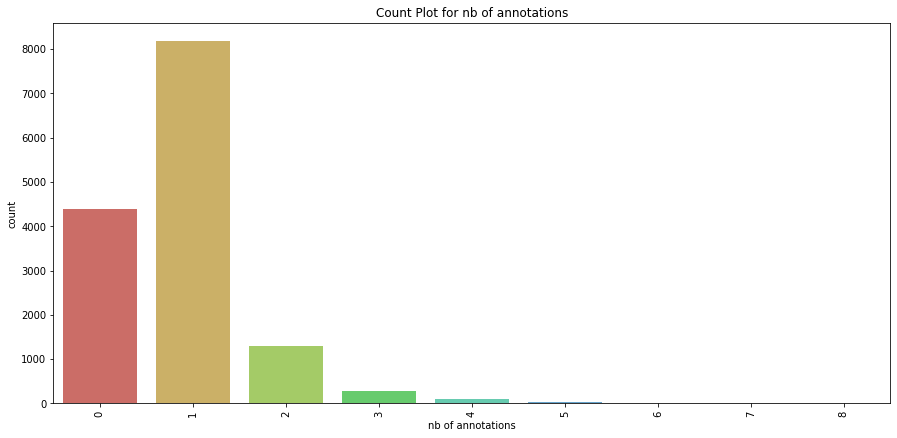

In [66]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for nb of annotations')
sns.countplot(x = 'nb of annotations', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

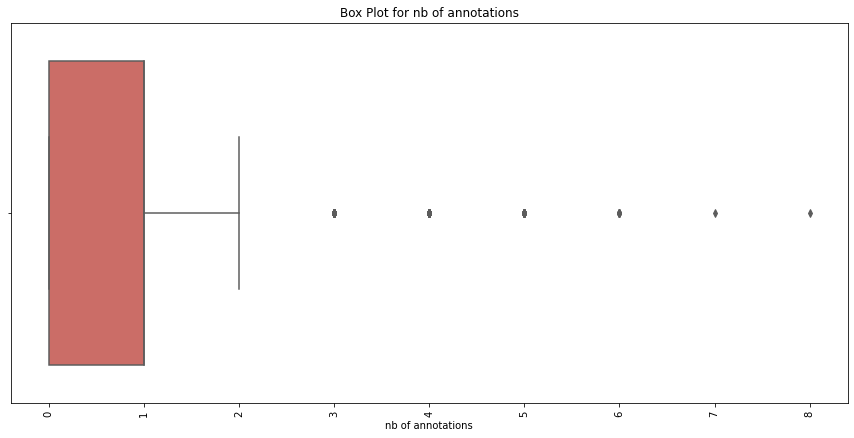

In [67]:
plt.figure(figsize=[15,7],)
plt.title('Box Plot for nb of annotations')
sns.boxplot(x = 'nb of annotations', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [68]:
fig = px.box(df, x = 'nb of annotations')
fig.show()

In [69]:
new = df[['id','annotation','location', 'pn_history', 'feature_text']]

In [70]:
for idx in range(len(new)): 
    new["location"][idx] = new["location"][idx].replace(";" , "','")  
     # For replacing semicolon ";"  with comma  ","

new["location"] = new["location"].apply(eval)  # Converting to list

In [71]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [72]:
feats = []
sents = []
labels = []
ids = []

for i in range(len(new)) :
    id_ = new.loc[i,'id']
    feat = new.loc[i,'feature_text']
    annot = eval(new.loc[i,'annotation'])
    loc = new.loc[i,'location']
    loc = [(int(l.split(' ')[0]), int(l.split(' ')[1])) for l in loc]
    notes_ = new.loc[i,'pn_history'].replace('\n', '.')
    
    # case with label = 1
    sents.extend(annot)
    feats.extend([feat]*len(annot))
    labels.extend([1]*len(annot))
    ids.extend([id_]*len(annot))
    
    # we loop over text before and after annotations
    for idx,(s, e) in enumerate(loc) :
        try :
            before_an = sent_tokenize(notes_[loc[idx-1][1]:s]) # do it for each annot
            after_an = sent_tokenize(notes_[e:loc[idx+1][0]])
        except :
            before_an = sent_tokenize(notes_[:s]) # do it for each annot
            after_an = sent_tokenize(notes_[e:])
            
        # case with label = 0    
        sents.extend(before_an)
        sents.extend(after_an)
        n = len(before_an+after_an)
        feats.extend([feat]*n)
        labels.extend([0]*n)
        ids.extend([id_]*n)

In [73]:
# we create our dataset to use in modeling
fornn = pd.DataFrame(list(zip(ids, sents, feats, labels)),
               columns =['id','sent','feature', 'label'])
fornn.head()

,id,sent,feature,label
0,00016_000,dad with recent heart attcak,Family-history-of-MI-OR-Family-history-of-myoc...,1
1,00016_000,HPI: 17yo M presents with palpitations.,Family-history-of-MI-OR-Family-history-of-myoc...,0
2,00016_000,Patient reports 3-4 months of intermittent epi...,Family-history-of-MI-OR-Family-history-of-myoc...,0
3,00016_000,2 days ago during a soccer game had an episode...,Family-history-of-MI-OR-Family-history-of-myoc...,0
4,00016_000,"Of note patient endorses abusing adderall, pri...",Family-history-of-MI-OR-Family-history-of-myoc...,0


In [74]:
fornn.tail()

,id,sent,feature,label
130310,95333_916,today.,Subjective-fever,0
130311,95333_916,Neck stiffness.,Subjective-fever,0
130312,95333_916,Nausea and vomiting.,Subjective-fever,0
130313,95333_916,"No dizzyness or lightheadedness, no weakness, ...",Subjective-fever,0
130314,95333_916,.ROS: otherwise negative\r.PMH: none\r.PSH: no...,Subjective-fever,0


In [75]:
fornn['label'].unique()

array([1, 0])

In [76]:
fornn['label'].value_counts()

0    118081
1     12234
Name: label, dtype: int64

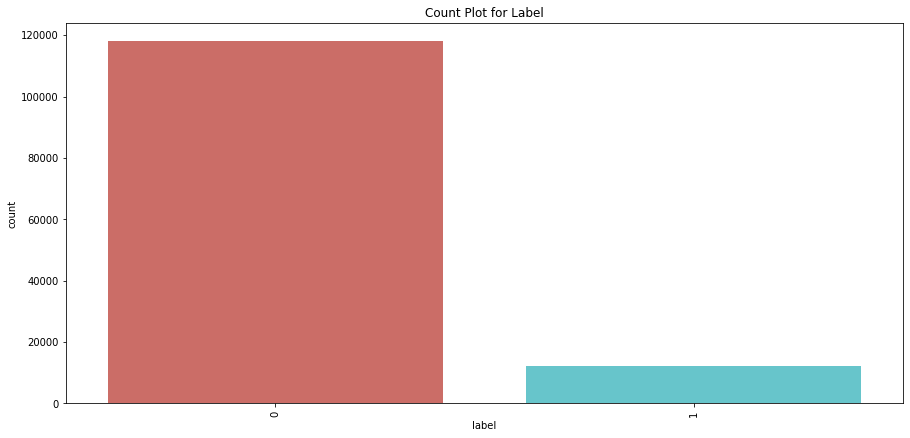

In [77]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for Label')
sns.countplot(x = 'label', data = fornn, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [78]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [79]:
def process(paragraph) :
    ps = PorterStemmer()
    corpus = []
    
    # keep just letters and turn it into lowercase
    paragraph = paragraph.replace('-', ' ')
    cleaned = re.sub('[^a-zA-Z]', ' ', paragraph)
    cleaned = cleaned.lower().split()

    #remove stopwords + stemming 
    cleaned = [ps.stem(word) for word in cleaned if not word.casefold() in stop_words]
    cleaned = ' '.join(cleaned)
    #corpus.append(cleaned)

    return cleaned

In [80]:
fornn['sent'] = fornn['sent'].apply(process)
fornn['feature'] = fornn['feature'].apply(process)

In [81]:
fornn.head()

,id,sent,feature,label
0,00016_000,dad recent heart attcak,famili histori mi famili histori myocardi infarct,1
1,00016_000,hpi yo present palpit,famili histori mi famili histori myocardi infarct,0
2,00016_000,patient report month intermitt episod heart be...,famili histori mi famili histori myocardi infarct,0
3,00016_000,day ago soccer game episod time chest pressur ...,famili histori mi famili histori myocardi infarct,0
4,00016_000,note patient endors abus adderal primarili stu...,famili histori mi famili histori myocardi infarct,0


In [82]:
modelB = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

corpus = fornn.loc[:, 'sent']
emb_sent = modelB.encode(corpus)

corpus = fornn.loc[:, 'feature']
emb_feat =  modelB.encode(corpus)

encoding_data_file_quest1='encoding_sen'
encoding_data_file_quest2='encoding_feat'

with open(encoding_data_file_quest1, "wb") as fp:
        pickle.dump(emb_sent, fp)

with open(encoding_data_file_quest2, "wb") as fp:
        pickle.dump(emb_feat, fp)

In [83]:
# We get our sentences and features embeddings :

encoding_data_file_quest1='encoding_sen'
encoding_data_file_quest2='encoding_feat'

In [84]:
with open(encoding_data_file_quest1, "rb") as fp:
    emb_sent=pickle.load(fp)

with open(encoding_data_file_quest2, "rb") as fp:   
    emb_feat=pickle.load(fp)

In [85]:
train_vec1 = np.asarray(emb_sent, np.float32)
train_vec2 = np.asarray(emb_feat, np.float32)
train_label = np.asarray(fornn.loc[:, 'label'],np.float32)

In [86]:
input1 = Input(shape=(768,))
input2 = Input(shape=(768,))

# we concatenate the two inputs = embeddings for each feature with associated sentence
x = keras.layers.concatenate([input1,input2], axis=-1)

# we add a three dense layers with three dropout layers for oferfitting reasons, the last Dense layer is to return the similarity score between -1 and 1  
x = Dense(1024,activation='relu') (x)
x = Dropout(0.5) (x)
x = Dense(256,activation='relu') (x)
x = Dropout(0.5) (x)
x = Dense(64,activation='relu') (x)

output = Dense(1,activation='sigmoid') (x)

model = Model(inputs=[input1,input2],outputs=output)
model.summary()

# we compile our model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 1536)         0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1024)         1573888     ['concatenate[0][0]']        

In [87]:
history=model.fit([train_vec1, train_vec2], train_label, 
    epochs=30,batch_size=200,
    validation_split=0.2) # we can add an early stopping param

Epoch 1/30
522/522 [==============================] - 35s 64ms/step - loss: 0.1301 - acc: 0.9511 - val_loss: 0.1609 - val_acc: 0.9445
Epoch 2/30
522/522 [==============================] - 28s 53ms/step - loss: 0.0755 - acc: 0.9728 - val_loss: 0.1899 - val_acc: 0.9388
Epoch 3/30
522/522 [==============================] - 36s 69ms/step - loss: 0.0616 - acc: 0.9783 - val_loss: 0.1594 - val_acc: 0.9365
Epoch 4/30
522/522 [==============================] - 27s 52ms/step - loss: 0.0515 - acc: 0.9814 - val_loss: 0.1795 - val_acc: 0.9472
Epoch 5/30
522/522 [==============================] - 31s 59ms/step - loss: 0.0462 - acc: 0.9836 - val_loss: 0.1730 - val_acc: 0.9396
Epoch 6/30
522/522 [==============================] - 27s 52ms/step - loss: 0.0425 - acc: 0.9847 - val_loss: 0.1865 - val_acc: 0.9494
Epoch 7/30
522/522 [==============================] - 27s 52ms/step - loss: 0.0396 - acc: 0.9860 - val_loss: 0.2217 - val_acc: 0.9383
Epoch 8/30
522/522 [==============================] - 27s 52ms

In [88]:
ntest = pd.merge(df4, df.drop(['id', 'case_num', 'location', 'annotation','nb of annotations'], axis=1)
             , on = ['pn_num', 'feature_num'], how = 'inner')

ntest = ntest.drop(['case_num','pn_num','feature_num'],axis=1)
ntest.head()

,id,pn_history,feature_text
0,00016_000,HPI: 17yo M presents with palpitations. Patien...,Family-history-of-MI-OR-Family-history-of-myoc...
1,00016_001,HPI: 17yo M presents with palpitations. Patien...,Family-history-of-thyroid-disorder
2,00016_002,HPI: 17yo M presents with palpitations. Patien...,Chest-pressure
3,00016_003,HPI: 17yo M presents with palpitations. Patien...,Intermittent-symptoms
4,00016_004,HPI: 17yo M presents with palpitations. Patien...,Lightheaded


In [89]:
res = []
loc = []

for feat, notes in zip(ntest.feature_text.values, ntest.pn_history.values) :
    sentences = sent_tokenize(notes.replace('\n','.'))
    each = []

    # we process the given sentences then get the embeddings
    for s in sentences :
        each.extend(re.split(', |\r', s.replace('"',' '))) #     s.split(', | \r')
    sentencesp = [process(elt) for elt in each ]
    sentences_ = modelB.encode(sentencesp)
    sentences_ = np.asarray(sentences_, np.float32)

    # we do the same with the feature
    n = len(sentences_)
    featp = process(feat)
    feat_ = modelB.encode(featp)
    feat_ = [feat_]*n
    feat_ = np.asarray(feat_, np.float32)

    # we get the two more relevant predictions
    preds = model.predict([sentences_, feat_], batch_size=200)
    sen = np.argsort(preds[:,0])[-2:]
    rel = [each[idx] for idx in sen]

    # as the model don't pick sometimes sentences where the feature is mentioned we add it manualy to our results
    add = [feat.lower().replace('-',' ') for sen in sentencesp if ((featp in sen)|(sen in featp))]
    rel.extend(add)
    res.append(rel)

    l = [f'{notes.find(elt)} {notes.find(elt)+len(elt)}' for elt in rel if notes.find(elt)!=-1]
    loc.append(l)

1/1 [==============================] - 0s 21ms/step


In [90]:
encoding_data_file_quest1='res'
encoding_data_file_quest2='loc'

In [91]:
res

[['abdominal paun', ' dad with recent heart attcak'],
 ['changes in bowel or urinary habits.', '.FHx: mom with  thyroid disease'],
 ['abdominal paun', 'headache', 'chest pressure'],
 ['uses condoms', 'diaphoresis'],
 ['diaphoresis', 'abdominal paun']]

In [92]:
loc

[['569 583', '695 724'],
 ['585 620'],
 ['569 583', '505 513', '203 217'],
 ['926 938', '476 487'],
 ['476 487', '569 583']]

In [93]:
loc = [';'.join(elt) for elt in loc]

In [94]:
df5['location'] = loc
df5.head()

,id,location
0,00016_000,569 583;695 724
1,00016_001,585 620
2,00016_002,569 583;505 513;203 217
3,00016_003,926 938;476 487
4,00016_004,476 487;569 583


In [95]:
df5.to_csv('submission.csv', index=False)

In [96]:
notes_counts = df1.groupby("case_num").count()
fig = px.bar(data_frame =notes_counts, 
             x = notes_counts.index,
             y = 'pn_num' , 
             color = "pn_num",
             color_continuous_scale="Emrld") 
fig.update_layout(title = {
        'text': 'Distribution of patient notes for each case',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1,2, 3, 4,5, 6,7,8,9],
        ticktext = ['Case 0', 'Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9']),
                  template = "plotly_white")
fig.show()

In [97]:
all_notes = []
all_notes_len = []
for notes in df1['pn_history']:
    all_notes.append(notes)
    all_notes_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_notes_len))
fig = px.histogram(x = all_notes_len,  marginal="violin",nbins = 100)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of patient Notes")
fig.show()

Average length of Patient History -  818.1768139325203


In [98]:
feature_counts = df2.groupby("case_num").count()
fig = px.bar(data_frame =feature_counts, 
             x = feature_counts.index,
             y = 'feature_num' , 
             color = "feature_num",
             color_continuous_scale="Emrld") 
fig.update_layout(title = {
        'text': 'Distribution of Features for each case',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1,2, 3, 4,5, 6,7,8,9],
        ticktext = ['Case 0', 'Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7', 'Case 8', 'Case 9']),
                  template = "plotly_white")
fig.show()

In [99]:
all_feat = []
all_feat_len = []
for notes in df2['feature_text']:
    all_feat.append(notes)
    all_feat_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_feat_len))
fig = px.histogram(x = all_feat_len,  marginal="violin",nbins = 200)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of Features")
fig.show()

Average length of Patient History -  23.20979020979021


In [100]:
PATIENT_IDX = 74087
patient_df = df3[df3["pn_num"] == PATIENT_IDX]
patient_df

,id,case_num,pn_num,feature_num,annotation,location
10791,74087_700,7,74087,700,['female'],['27 33']
10792,74087_701,7,74087,701,[],[]
10793,74087_702,7,74087,702,"['only had 2 cycles in the past 5 months', 'he...","['130 168', '182 192', '218 240', '48 73']"
10794,74087_703,7,74087,703,['LMP was 2 months ago'],['97 117']
10795,74087_704,7,74087,704,['has not restarted contraception'],['641 672']
10796,74087_705,7,74087,705,[],[]
10797,74087_706,7,74087,706,['not been able to get pregnant'],['465 494']
10798,74087_707,7,74087,707,['35 yo'],['21 26']
10799,74087_708,7,74087,708,['6 months'],['87 95']


In [101]:
print(f"\033[94mPatient Notes - ")
print(f'\033[94m',df1[df1["pn_num"] == PATIENT_IDX]["pn_history"].iloc[0])
print("------------")
print(f'\033[92mAnnotaions:')
for i in range(len(patient_df)):
    print(f'\033[92m',patient_df["annotation"].iloc[i])

Patient Notes - 
 Angela Tompkins is a 35 yo female presenting w/ abnormal menstraul cycles for the past 6 months. LMP was 2 months ago and she has only had 2 cycles in the past 5 months. She has had heavy flow during recent cycles and will last about 7 days. They used to only last 3-4 days and had regular intervals. She has hardly had any pain w/ her cycles. She used to take oral contraceptives but stopped eleven years ago to try and get pregnant. She has been unsuccessful and not been able to get pregnant despite having sexual intercourse with her boyfriend and trying "for years". She denies trying to become pregnant now and in the recent past. She has not restarted contraception since trying to become pregnant. She had her first pap smear 6 months ago that did not have any abnormal findings. She has regular obgyn follow up. Her aunt has breast cancer and her grandmother had cervical cancer. Family has not done any genetic testing.
------------
Annotaions:
 ['female']
 []
 ['only had

In [102]:
print("Number of Empty annotions and locations = ", sum(df3["location"] == '[]'))

Number of Empty annotions and locations =  4399


In [103]:
df3["location"] = df3["location"].apply(eval)
df3['annotation'] = df3['annotation'].apply(eval)
df3["annot_count"] = 0
for i in range(len(df3)):
    df3["annot_count"][i] = len(df3["annotation"][i])
total_annot = 0
for idx in df3["annot_count"].value_counts().sort_index().index:
    total_annot += df3["annot_count"].value_counts().sort_index()[idx] * idx
print(f'\033[92mTotal number of Annotations is train data  : ' , total_annot)
print(f'\033[94mAnnotation count per row: ')
print(f'\033[94m',df3["annot_count"].value_counts().sort_index())

Total number of Annotations is train data  :  12234
Annotation count per row: 
 0    4399
1    8181
2    1296
3     287
4      99
5      27
6       9
7       1
8       1
Name: annot_count, dtype: int64


In [104]:
fig = px.bar(data_frame =df3, 
             x = df3["annot_count"].value_counts().sort_index().index,
             y = df3["annot_count"].value_counts().sort_index() , 
             color = df3["annot_count"].value_counts().sort_index(),
             color_continuous_scale="Emrld") 
fig.update_xaxes(title ="Number of Annotations")
fig.update_yaxes(title ="Number of Rows")
fig.update_layout(title = {
        'text': 'Number of Annotations per row',
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'} ,
                   
                  template = "plotly_white")
fig.show()

In [105]:
annot_lengths = []
all_annot_words = []
for annot in df3["annotation"]:
    for words in annot:
        annot_lengths.append(len(words))
        all_annot_words.append(words)
print("Average length of Annotations - ",np.mean(annot_lengths))
fig = px.histogram(x = annot_lengths,  marginal="violin",nbins = 300)
fig.update_layout(template="plotly_white")
fig.update_xaxes(title = "Lenght of Annotation")
fig.show()

Average length of Annotations -  16.528445316331535


In [106]:
import spacy

In [107]:
patient_df = df3[df3["pn_num"] == PATIENT_IDX]
location  = patient_df["location"]
annotation = patient_df["annotation"]
start_pos = []
end_pos = []
for i in location:
    for j in i:
        start_pos.append(j.split()[0])
        end_pos.append(j.split()[1])
        
ents = []
for i in range(len(start_pos)):
    ents.append({
        'start': int(start_pos[i]), 
        'end' : int(end_pos[i]),
        "label" : "Annotation"
    })
doc = {
    'text' : df1[df1["pn_num"] == PATIENT_IDX]["pn_history"].iloc[0],
    "ents" : ents
}
colors = {"Annotation" :"linear-gradient(90deg, #aa9cfc, #fc9ce7)" } 
options = {"colors": colors}
spacy.displacy.render(doc, style="ent", options = options , manual=True, jupyter=True);

In [108]:
import wordcloud

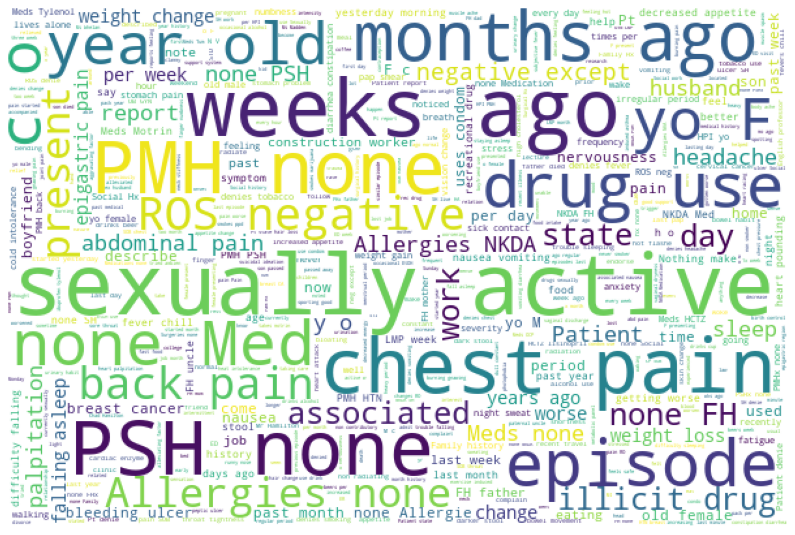

In [109]:
wordcloud_notes = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(all_notes))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_notes, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_notes);

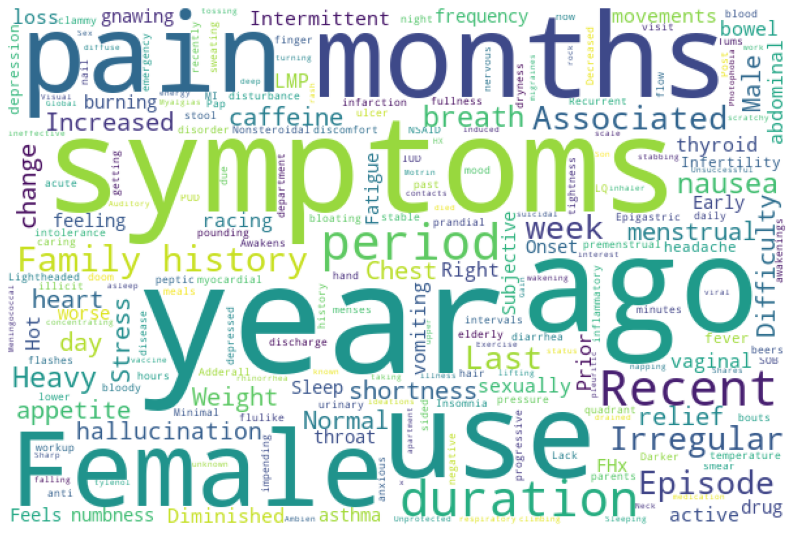

In [110]:
wordcloud_feat = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(all_feat))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_feat, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_feat);

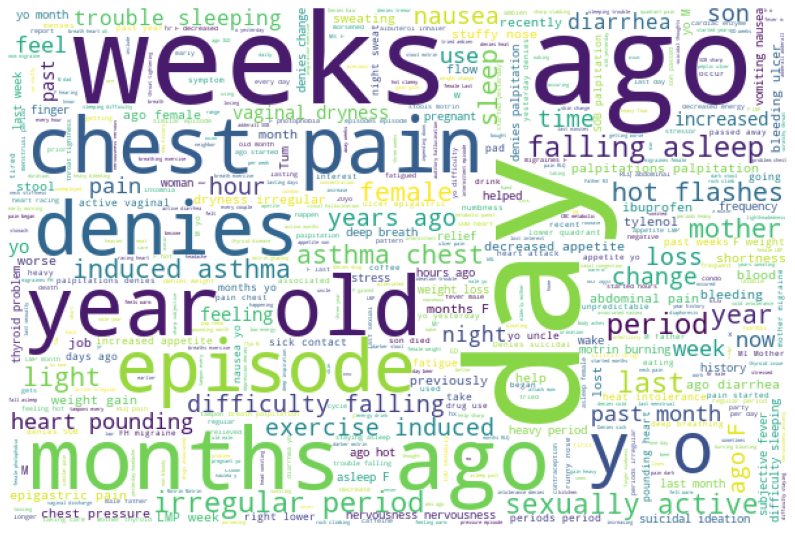

In [111]:

wordcloud_annot = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=5000,
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(all_annot_words))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_annot, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_annot);

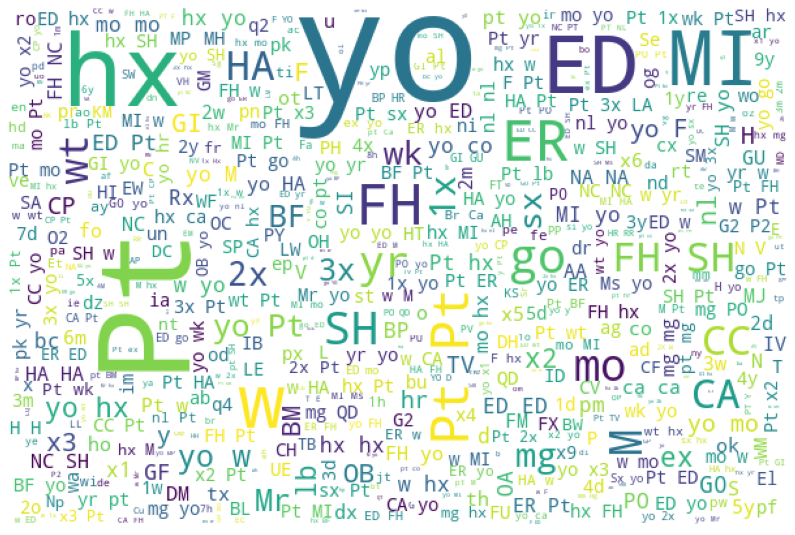

In [112]:
two  = []
for note in all_notes:
    for word in note.split():
        if len(word)==2:
            two.append(word)
wordcloud_two_chars = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, max_font_size=120, max_words=len(set(two)),
                      width = 600, height = 400,
                      background_color='white').generate(" ".join(two ))
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud_two_chars, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_two_chars);